### Importing relavent libraries


In [108]:
import pandas as pd
import seaborn as sns

In [109]:
# Load the dataset
df = pd.read_csv("../Datasets/Marketing campaign dataset.csv")

In [110]:
df.head()

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,...,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords
0,2733,7,2022-05-01,128,Facebook Ads,1000,300.0,250.0,#The Power of X,90.0,...,1,14.058514,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_end,delicate bracelets
1,2733,8,2022-05-02,16,DV360,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,99.633496,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,summer jewelry
2,2733,9,2022-05-03,128,Facebook Ads,1000,300.0,250.0,#Embrace Your Individuality with X,90.0,...,1,109.419677,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,artisan jewelry
3,2733,10,2022-05-04,128,Facebook Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,115.209499,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,layered bracelets
4,2733,11,2022-05-05,4,Google Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,66.990104,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,minimalist jewelry


In [111]:
print(df.dtypes)

campaign_item_id         int64
no_of_days               int64
time                    object
ext_service_id           int64
ext_service_name        object
creative_id              int64
creative_width         float64
creative_height        float64
search_tags             object
template_id            float64
landing_page            object
advertiser_id            int64
advertiser_name         object
network_id               int64
approved_budget        float64
advertiser_currency     object
channel_id               int64
channel_name            object
max_bid_cpm            float64
network_margin         float64
campaign_budget_usd    float64
impressions              int64
clicks                   int64
stats_currency          object
currency_code           object
exchange_rate            int64
media_cost_usd         float64
position_in_content    float64
unique_reach           float64
total_reach            float64
search_tag_cat          object
cmi_currency_code       object
timezone

#### Check for null values

In [112]:
print(df.isnull().sum(), len(df))

campaign_item_id           0
no_of_days                 0
time                       0
ext_service_id             0
ext_service_name           0
creative_id                0
creative_width          3412
creative_height         3412
search_tags                0
template_id             3412
landing_page               0
advertiser_id              0
advertiser_name            0
network_id                 0
approved_budget          406
advertiser_currency        0
channel_id                 0
channel_name               0
max_bid_cpm            65206
network_margin             0
campaign_budget_usd        0
impressions                0
clicks                     0
stats_currency             0
currency_code              0
exchange_rate              0
media_cost_usd             0
position_in_content    72612
unique_reach           72612
total_reach            72612
search_tag_cat             0
cmi_currency_code          0
timezone                   0
weekday_cat                0
keywords      

#### Removing 3 columns which are completely null

In [113]:
df = df.drop(columns=['total_reach','unique_reach','position_in_content','max_bid_cpm'])

#### Changing the creative columns to one column

In [114]:
df['creative_height'].unique()
df['creative_width'].unique()

array([300.,   0.,  nan])

In [115]:
df['creative_dimension'] = df['creative_height'] * df['creative_width']
df = df.drop(columns=['creative_height','creative_width'])

In [116]:
print(df.isnull().sum(), len(df))

campaign_item_id          0
no_of_days                0
time                      0
ext_service_id            0
ext_service_name          0
creative_id               0
search_tags               0
template_id            3412
landing_page              0
advertiser_id             0
advertiser_name           0
network_id                0
approved_budget         406
advertiser_currency       0
channel_id                0
channel_name              0
network_margin            0
campaign_budget_usd       0
impressions               0
clicks                    0
stats_currency            0
currency_code             0
exchange_rate             0
media_cost_usd            0
search_tag_cat            0
cmi_currency_code         0
timezone                  0
weekday_cat               0
keywords                  0
creative_dimension     3412
dtype: int64 72612


In [117]:
df['template_id'].unique()

array([90., 23., 92., 89., 93., nan])

##### Leaving template as it is

In [118]:
df['creative_dimension'].unique()

array([75000.,     0.,    nan])

In [119]:
df['creative_id'].unique()

array([ 1000,  1005,  1010, ..., 15595, 15600, 15605], dtype=int64)

In [120]:
df = df.drop(columns=['creative_id'])

In [121]:
# Remove rows where 'creative_dimension' is null (NaN)
df = df.dropna(subset=['creative_dimension'])

# Check the cleaned dataframe
print(df.head())

   campaign_item_id  no_of_days        time  ext_service_id ext_service_name  \
0              2733           7  2022-05-01             128     Facebook Ads   
1              2733           8  2022-05-02              16            DV360   
2              2733           9  2022-05-03             128     Facebook Ads   
3              2733          10  2022-05-04             128     Facebook Ads   
4              2733          11  2022-05-05               4       Google Ads   

                          search_tags  template_id  \
0                     #The Power of X         90.0   
1                      #Be Bold. Be X         90.0   
2  #Embrace Your Individuality with X         90.0   
3                      #Be Bold. Be X         90.0   
4                      #Be Bold. Be X         90.0   

                                        landing_page  advertiser_id  \
0  https://www.abcjewelry.com/collections/boho-je...           4756   
1  https://www.abcjewelry.com/women/costume-jewelry/

In [122]:
df.shape

(69200, 29)

<Axes: xlabel='template_id', ylabel='creative_dimension'>

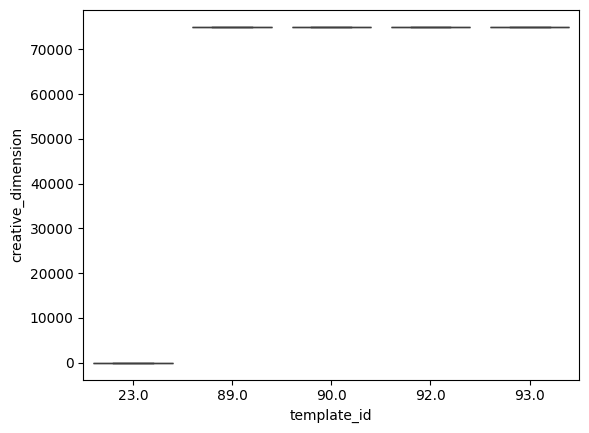

In [123]:
sns.boxplot(x=df['template_id'], y=df['creative_dimension'])

#### Campaign id

In [124]:
df['campaign_item_id'].unique()

array([2733, 2766, 2802, 2850, 2851, 2879, 3223, 3054, 3132, 3150, 3149,
       3157, 3153, 3154, 3222, 3220, 3221, 3219, 3173, 3166, 3164, 3165,
       2934, 2949, 2950, 2952, 2977, 2980, 2982, 3033, 3034, 3035, 3038,
       3039, 3040, 3041, 3050, 3042, 3052, 3053, 3055, 3056, 3045, 3046,
       3047, 3048, 3049, 3051, 3057, 3058, 3098, 3099, 3100, 3101, 3102,
       3103, 3104, 3107, 3129, 3130, 3131, 3127, 3128, 3133, 3134, 3147,
       3148, 3151, 3152, 3155, 3156, 3158, 3159, 3160, 3161, 3162, 3163,
       3167, 3168, 3169, 3170, 3171, 3172, 3174, 3175, 3176, 3177, 3178,
       3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189,
       3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3199, 3200, 3201,
       3202, 3204, 3208, 3207, 3209, 3210, 3211, 3212, 3213, 3214, 3215,
       3216, 3217, 3218, 3354, 3355, 3389, 3444, 3445, 3486, 3488, 3543,
       3545, 3546, 3547, 3557, 3558, 3559, 3719, 3959, 3960], dtype=int64)

##### Applying embedding to the campaign_id feature. if not the model might miscalculate relationship. 

In [125]:
import torch
import torch.nn as nn

# Map each unique campaign_item_id to an index starting from 0
id_mapping = {id_: idx for idx, id_ in enumerate(df['campaign_item_id'].unique())}
df['campaign_index'] = df['campaign_item_id'].map(id_mapping)

# Number of unique campaigns
num_campaigns = len(id_mapping)  # Total unique campaign IDs
embedding_dim = 16  # Dimensionality of the embedding vectors

# Create an embedding layer
campaign_embedding = nn.Embedding(num_embeddings=num_campaigns, embedding_dim=embedding_dim)

# Convert campaign_index to tensor
campaign_indices = torch.tensor(df['campaign_index'].values, dtype=torch.long)

# Get the embeddings
embedded_campaigns = campaign_embedding(campaign_indices)
print("Embedding Shape:", embedded_campaigns.shape)  # Should match (num_samples, embedding_dim)


Embedding Shape: torch.Size([69200, 16])


In [126]:
# Print the mapping dictionary
print("Campaign ID to Index Mapping:")
for campaign_id, campaign_index in id_mapping.items():
    print(f"Campaign ID: {campaign_id} -> Campaign Index: {campaign_index}")


Campaign ID to Index Mapping:
Campaign ID: 2733 -> Campaign Index: 0
Campaign ID: 2766 -> Campaign Index: 1
Campaign ID: 2802 -> Campaign Index: 2
Campaign ID: 2850 -> Campaign Index: 3
Campaign ID: 2851 -> Campaign Index: 4
Campaign ID: 2879 -> Campaign Index: 5
Campaign ID: 3223 -> Campaign Index: 6
Campaign ID: 3054 -> Campaign Index: 7
Campaign ID: 3132 -> Campaign Index: 8
Campaign ID: 3150 -> Campaign Index: 9
Campaign ID: 3149 -> Campaign Index: 10
Campaign ID: 3157 -> Campaign Index: 11
Campaign ID: 3153 -> Campaign Index: 12
Campaign ID: 3154 -> Campaign Index: 13
Campaign ID: 3222 -> Campaign Index: 14
Campaign ID: 3220 -> Campaign Index: 15
Campaign ID: 3221 -> Campaign Index: 16
Campaign ID: 3219 -> Campaign Index: 17
Campaign ID: 3173 -> Campaign Index: 18
Campaign ID: 3166 -> Campaign Index: 19
Campaign ID: 3164 -> Campaign Index: 20
Campaign ID: 3165 -> Campaign Index: 21
Campaign ID: 2934 -> Campaign Index: 22
Campaign ID: 2949 -> Campaign Index: 23
Campaign ID: 2950 ->

#### Number of days

In [127]:
days = df['no_of_days']

# Calculate the minimum and maximum values
min_days = days.min()
max_days = days.max()

print(f"Minimum days: {min_days}")
print(f"Maximum days: {max_days}")

Minimum days: 0
Maximum days: 118


##### Normalizing this will be a good option for GNN

In [128]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the 'impressions' column
df['no_of_days'] = scaler.fit_transform(df[['no_of_days']])

# Check the result
print(df[['no_of_days']].head())

   no_of_days
0    0.059322
1    0.067797
2    0.076271
3    0.084746
4    0.093220


#### Time and Week_cat


In [129]:
print(df[['time']].head())

         time
0  2022-05-01
1  2022-05-02
2  2022-05-03
3  2022-05-04
4  2022-05-05


##### Extract date components from time

In [130]:
# Convert the 'time' column to datetime format if it's not already
df['time'] = pd.to_datetime(df['time'])

# Extract day of the week (0=Monday, 6=Sunday)
df['day_of_week'] = df['time'].dt.dayofweek

# Extract month (1=January, 12=December)
df['month'] = df['time'].dt.month

# Extract day of the year (1-365/366)
df['day_of_year'] = df['time'].dt.dayofyear

# Display the new date-related columns
print(df[['time', 'day_of_week', 'month', 'day_of_year']].head())


        time  day_of_week  month  day_of_year
0 2022-05-01            6      5          121
1 2022-05-02            0      5          122
2 2022-05-03            1      5          123
3 2022-05-04            2      5          124
4 2022-05-05            3      5          125


##### Applying cyclic feature for better relationship

In [131]:
import numpy as np

# Apply sine and cosine transformations to cyclic features
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Display the encoded columns
print(df[['time', 'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos']].head())



        time  day_of_week_sin  day_of_week_cos  month_sin  month_cos
0 2022-05-01        -0.781831         0.623490        0.5  -0.866025
1 2022-05-02         0.000000         1.000000        0.5  -0.866025
2 2022-05-03         0.781831         0.623490        0.5  -0.866025
3 2022-05-04         0.974928        -0.222521        0.5  -0.866025
4 2022-05-05         0.433884        -0.900969        0.5  -0.866025


##### oneHot encoding the week_cat

In [132]:
# # Apply one-hot encoding to only 'weekday_cat' in the original DataFrame
# df = pd.get_dummies(df, columns=['weekday_cat'], drop_first=False)

# # Inspect the new columns created by get_dummies to confirm column names
# print(df.columns)

# # Now, we'll use the exact column names created by get_dummies
# df['weekend'] = df['weekday_cat_weekend'].astype(int)
# df['weekday'] = df['weekday_cat_weekday'].astype(int)

# # Drop the original columns created by get_dummies
# df = df.drop(columns=['weekday_cat_weekend', 'weekday_cat_weekday'])

# # Print the resulting DataFrame
# print(df)

#### Plateform of the advertisement

In [133]:
df['ext_service_id'].unique()
df['ext_service_name'].unique()

array(['Facebook Ads', 'DV360', 'Google Ads'], dtype=object)

##### Checking whether both are inter connected

In [134]:
# Create a combined feature by concatenating 'ext_service_id' and 'ext_service_name'
combined_feature = df[['ext_service_id', 'ext_service_name']]

# Display the unique combinations of the two features
unique_combinations = combined_feature.drop_duplicates()
print(unique_combinations)

   ext_service_id ext_service_name
0             128     Facebook Ads
1              16            DV360
4               4       Google Ads


#####  We can see theres a connection between id and name. Considering dimnesionality lable encoding is applied

In [135]:
from sklearn.preprocessing import LabelEncoder

# Combine 'ext_service_id' and 'ext_service_name' into a single feature
df['ext_service_combined'] = df['ext_service_id'].astype(str) + "_" + df['ext_service_name']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the combined feature
df['ext_service_combined_label'] = label_encoder.fit_transform(df['ext_service_combined'])

# Display the first few rows of the updated DataFrame
print(df[['ext_service_combined', 'ext_service_combined_label']].head())


  ext_service_combined  ext_service_combined_label
0     128_Facebook Ads                           0
1             16_DV360                           1
2     128_Facebook Ads                           0
3     128_Facebook Ads                           0
4         4_Google Ads                           2


In [136]:
df.shape

(69200, 39)

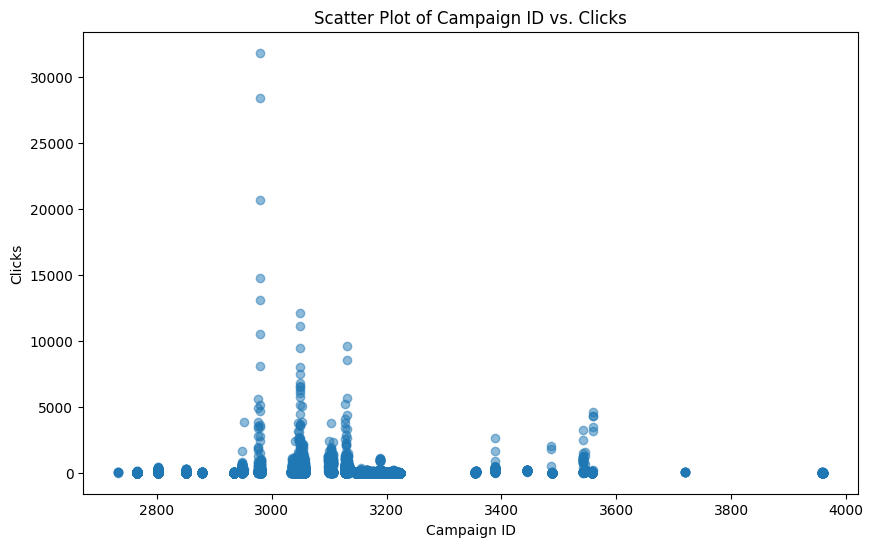

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['campaign_item_id'], df['clicks'], alpha=0.5)
plt.title('Scatter Plot of Campaign ID vs. Clicks')
plt.xlabel('Campaign ID')
plt.ylabel('Clicks')
plt.show()

In [138]:
print(df['impressions'])

0         837
1        2634
2        2135
3        2327
4        1538
         ... 
69195    1274
69196    1210
69197    1153
69198    1156
69199     590
Name: impressions, Length: 69200, dtype: int64


In [139]:
impressions = df['impressions']

# Calculate the minimum and maximum values
min_impressions = impressions.min()
max_impressions = impressions.max()

print(f"Minimum Impressions: {min_impressions}")
print(f"Maximum Impressions: {max_impressions}")

Minimum Impressions: 511
Maximum Impressions: 153959


##### Since we have larger different in the min max value. its better to normalize

In [140]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the 'impressions' column
df['normalized_impressions'] = scaler.fit_transform(df[['impressions']])

# Check the result
print(df[['impressions', 'normalized_impressions']].head())

   impressions  normalized_impressions
0          837                0.002124
1         2634                0.013835
2         2135                0.010583
3         2327                0.011835
4         1538                0.006693


In [141]:
df = df.drop(columns=['impressions'])

#### Search tags

In [142]:
df['search_tags'].unique()

array(['#The Power of X', '#Be Bold. Be X',
       '#Embrace Your Individuality with X',
       '#The Ultimate Fashion Statement with X',
       '#The X Factor - Fashion for the Fearless', '#Timeless X Style'],
      dtype=object)

#### Perform text embedding for search tags which is most suitable for GNN. then Applying PCA to reduce the dimensionality

In [143]:
# from sentence_transformers import SentenceTransformer
# import pandas as pd
# import numpy as np
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# model = SentenceTransformer('all-MiniLM-L6-v2')  # You can choose other models if desired

# # Step 3: Generate embeddings for the 'search_tags' column
# df['search_tag_embedding'] = df['search_tags'].apply(lambda x: model.encode(x))

# # Step 4: Convert embeddings into a separate dataframe (for better inspection and use)
# embeddings_df = pd.DataFrame(df['search_tag_embedding'].tolist(), index=df.index)

# # Standardize the embeddings
# scaler = StandardScaler()
# embeddings_scaled = scaler.fit_transform(embeddings_df)

# # Apply PCA to reduce dimensionality
# pca = PCA(n_components=0.95)  # Retain 95% of variance
# embeddings_pca = pca.fit_transform(embeddings_scaled)

# # Check the explained variance ratio to confirm the retained variance
# print(f"Explained Variance Ratio: {sum(pca.explained_variance_ratio_):.2f}")

# # Create a new dataframe with the reduced dimensions
# embeddings_pca_df = pd.DataFrame(embeddings_pca, columns=[f'PC{i+1}' for i in range(embeddings_pca.shape[1])])

# # Optionally, combine the reduced embeddings with the original dataframe
# df = pd.concat([df.reset_index(drop=True), embeddings_pca_df], axis=1)

# # Drop the original high-dimensional embeddings (optional)
# df = df.drop(columns=[col for col in df.columns if 'search_tag_embedding' in col], errors='ignore')

# print(df.head())

In [144]:
df['search_tag_cat'].unique()

array(['Others', 'Youtube', 'Inmarket', 'Retargeting', 'Affinity'],
      dtype=object)

##### Applying One-hot-encoding since theres no proper relationship

In [145]:
# Apply One-Hot Encoding to the 'job' column
df_encoded = pd.get_dummies(df['search_tag_cat'], prefix='search_cat')

# Convert True/False to 1/0
df_encoded = df_encoded.astype(int)

# Optionally, concatenate the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'job' column
df.drop('search_tag_cat', axis=1, inplace=True)

df.head()

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,search_tags,template_id,landing_page,advertiser_id,advertiser_name,...,month_sin,month_cos,ext_service_combined,ext_service_combined_label,normalized_impressions,search_cat_Affinity,search_cat_Inmarket,search_cat_Others,search_cat_Retargeting,search_cat_Youtube
0,2733,0.059322,2022-05-01,128,Facebook Ads,#The Power of X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,...,0.5,-0.866025,128_Facebook Ads,0,0.002124,0,0,1,0,0
1,2733,0.067797,2022-05-02,16,DV360,#Be Bold. Be X,90.0,https://www.abcjewelry.com/women/costume-jewelry/,4756,Web,...,0.5,-0.866025,16_DV360,1,0.013835,0,0,1,0,0
2,2733,0.076271,2022-05-03,128,Facebook Ads,#Embrace Your Individuality with X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,...,0.5,-0.866025,128_Facebook Ads,0,0.010583,0,0,1,0,0
3,2733,0.084746,2022-05-04,128,Facebook Ads,#Be Bold. Be X,90.0,https://www.abcjewelry.com/collections/rhinest...,4756,Web,...,0.5,-0.866025,128_Facebook Ads,0,0.011835,0,0,1,0,0
4,2733,0.093220,2022-05-05,4,Google Ads,#Be Bold. Be X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,...,0.5,-0.866025,4_Google Ads,2,0.006693,0,0,1,0,0


#### Landing page

In [146]:
df['landing_page'].unique()

array(['https://www.abcjewelry.com/collections/boho-jewelry-for-women',
       'https://www.abcjewelry.com/women/costume-jewelry/',
       'https://www.abcjewelry.com/collections/rhinestone-jewelry-for-women',
       'https://www.abcjewelry.com/collections',
       'https://www.abcjewelry.com/collections/gemstone-jewelry-for-women',
       'https://www.abcjewelry.com/collections/statement-necklaces-for-women',
       'https://www.abcjewelry.com/collections/bold-jewelry-for-women',
       'https://www.abcjewelry.com/collections/hoop-earrings-for-women',
       'https://www.abcjewelry.com/collections/layered-jewelry-for-women',
       'https://www.abcjewelry.com/collections/cuff-bracelets-for-women',
       'https://www.abcjewelry.com/collections/pendant-necklaces-for-women',
       'https://www.abcjewelry.com/collections/pearl-jewelry-for-women',
       'https://www.abcjewelry.com/women/boho-jewelry/',
       'https://www.abcjewelry.com/collections/beaded-jewelry-for-women',
       'htt

In [147]:
# from sentence_transformers import SentenceTransformer
# import pandas as pd
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # Initialize the pre-trained model (You can choose other models based on your needs)
# model = SentenceTransformer('all-MiniLM-L6-v2')  # This model is fast and performs well for general tasks

# # Generate embeddings in batches
# embeddings = model.encode(df['landing_page'].tolist(), batch_size=32, show_progress_bar=True)
# df['landing_page_embedding'] = list(embeddings)

# # Convert the embeddings into a DataFrame (each embedding is a vector)
# embeddings_df = pd.DataFrame(df['landing_page_embedding'].tolist(), index=df.index)

# # Optionally, standardize the embeddings before applying PCA
# scaler = StandardScaler()
# embeddings_scaled = scaler.fit_transform(embeddings_df)

# # Apply PCA to reduce dimensionality (retain 95% of variance, for example)
# pca = PCA(n_components=0.95)  # You can adjust the variance ratio if needed
# embeddings_pca = pca.fit_transform(embeddings_scaled)

# # Create a new DataFrame with the reduced dimensionality
# embeddings_pca_df = pd.DataFrame(embeddings_pca, columns=[f'PC{i+1}' for i in range(embeddings_pca.shape[1])])

# # Optionally, combine the reduced embeddings with the original dataframe
# df = pd.concat([df, embeddings_pca_df], axis=1)

# # Drop the original 'landing_page' column if it's no longer needed
# # df = df.drop(columns=['landing_page'])

# # Display the updated dataframe with embeddings
# print(df.head())


#### Check whether advertiser id and advertiser names are inter connected

In [148]:
# Create a combined feature by concatenating 'advertiser_id' and 'advertiser_name '
combined_feature = df[['advertiser_id', 'advertiser_name']]

# Display the unique combinations of the two features
unique_combinations = combined_feature.drop_duplicates()
print(unique_combinations)

       advertiser_id advertiser_name
0               4756             Web
5               5191           Brand
3586            5209           Brand
7126            5395           Luxor
7430            5227      Almaza Bay
7601            5611             USA
7646            5785             USA
7816            5641       Karnataka
7830            5686     Maharashtra
7843            6382            Oman
13636           6391             UAE
15286           5857           Cairo
15672           5914       Al Ahmadi
15782           5908     Addis Ababa
15910           5917        Vadodara
16103           5938         Chennai
16105           6112      Coimbatore
16198           5755           Malad
16262           6019          Indore
16483           6340            Pali
16487           6292  Andhra Pradesh
17185           6337    Kuala Lumpur
18003           6298         Gujarat
18602           6325        Chandpur
18647           6316     West Bengal
19424           6331      Tamil Nadu
1

In [149]:
# Create a combined feature by concatenating 'advertiser_id' and 'advertiser_name'
combined_feature = df[['advertiser_id', 'advertiser_name']]

# 1. Check if there are multiple names for the same 'advertiser_id'
multiple_names_for_id = combined_feature.groupby('advertiser_id')['advertiser_name'].nunique()
multiple_names_for_id = multiple_names_for_id[multiple_names_for_id > 1]  # Filter for IDs with more than 1 name
print("Multiple names for the same 'advertiser_id':")
print(multiple_names_for_id)

# 2. Check if there are multiple IDs for the same 'advertiser_name'
multiple_ids_for_name = combined_feature.groupby('advertiser_name')['advertiser_id'].nunique()
multiple_ids_for_name = multiple_ids_for_name[multiple_ids_for_name > 1]  # Filter for names with more than 1 ID
print("\nMultiple IDs for the same 'advertiser_name':")
print(multiple_ids_for_name)


Multiple names for the same 'advertiser_id':
Series([], Name: advertiser_name, dtype: int64)

Multiple IDs for the same 'advertiser_name':
advertiser_name
Brand         2
Chattogram    2
USA           2
Name: advertiser_id, dtype: int64


In [150]:
from sentence_transformers import SentenceTransformer
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Initialize the pre-trained model for embedding
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for 'advertiser_name'
advertiser_name_embeddings = model.encode(df['advertiser_name'].tolist(), show_progress_bar=True)

# Create a DataFrame for embeddings
df_advertiser_emb = pd.DataFrame(advertiser_name_embeddings, columns=[f'name_emb_{i+1}' for i in range(advertiser_name_embeddings.shape[1])])

# Optionally, reduce dimensionality of embeddings with PCA
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(df_advertiser_emb)

pca = PCA(n_components=0.95)  # Retain 95% variance
embeddings_pca = pca.fit_transform(embeddings_scaled)

# Create a DataFrame for PCA-reduced embeddings
df_advertiser_pca = pd.DataFrame(embeddings_pca, columns=[f'PC{i+1}' for i in range(embeddings_pca.shape[1])])

# Combine PCA-reduced embeddings with 'advertiser_id'
df = pd.concat([df.reset_index(drop=True), df_advertiser_pca], axis=1)

# Retain 'advertiser_id' as a feature
print(df.head())


Batches: 100%|██████████| 2163/2163 [01:27<00:00, 24.76it/s]


KeyboardInterrupt: 

Exception ignored in: 'zmq.backend.cython._zmq.Frame.__del__'
Traceback (most recent call last):
  File "_zmq.py", line 141, in zmq.backend.cython._zmq._check_rc
KeyboardInterrupt: 


   campaign_item_id  no_of_days       time  ext_service_id ext_service_name  \
0              2733    0.059322 2022-05-01             128     Facebook Ads   
1              2733    0.067797 2022-05-02              16            DV360   
2              2733    0.076271 2022-05-03             128     Facebook Ads   
3              2733    0.084746 2022-05-04             128     Facebook Ads   
4              2733    0.093220 2022-05-05               4       Google Ads   

                          search_tags  template_id  \
0                     #The Power of X         90.0   
1                      #Be Bold. Be X         90.0   
2  #Embrace Your Individuality with X         90.0   
3                      #Be Bold. Be X         90.0   
4                      #Be Bold. Be X         90.0   

                                        landing_page  advertiser_id  \
0  https://www.abcjewelry.com/collections/boho-je...           4756   
1  https://www.abcjewelry.com/women/costume-jewelry/      

In [151]:
df['network_id'].unique()

array([190, 287, 191, 188, 353, 350], dtype=int64)

In [152]:
df['advertiser_currency'].unique()

array(['SGD', 'USD', 'EGP', 'AED', 'INR'], dtype=object)

In [153]:
df['currency_code'].unique()

array(['SGD', 'USD', 'EGP', 'AED', 'INR'], dtype=object)

In [156]:
import pandas as pd

# Drop duplicates based on 'advertiser_name', 'currency_code', and 'advertiser_currency'
unique_combinations = df[['advertiser_name', 'currency_code', 'advertiser_currency']].drop_duplicates()

# Display the unique combinations
print(unique_combinations)


      advertiser_name currency_code advertiser_currency
0                 Web           SGD                 SGD
5               Brand           USD                 USD
7126            Luxor           EGP                 EGP
7430       Almaza Bay           EGP                 EGP
7601              USA           USD                 USD
7646              USA           AED                 AED
7816        Karnataka           INR                 INR
7830      Maharashtra           INR                 INR
7843             Oman           AED                 AED
13636             UAE           AED                 AED
15286           Cairo           USD                 USD
15672       Al Ahmadi           INR                 INR
15782     Addis Ababa           INR                 INR
15910        Vadodara           INR                 INR
16103         Chennai           INR                 INR
16105      Coimbatore           INR                 INR
16198           Malad           INR             

In [ ]:
# Apply One-Hot Encoding to the 'job' column
df_encoded = pd.get_dummies(df['advertiser_currency'], prefix='currency')

# Convert True/False to 1/0
df_encoded = df_encoded.astype(int)

# Optionally, concatenate the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'job' column
df.drop('advertiser_currency', axis=1, inplace=True)

print(df.head())

KeyError: 'advertiser_currency'

In [98]:
df['channel_id'].unique()

array([32,  8, 64,  1,  4], dtype=int64)

In [99]:
df['channel_name'].unique()

array(['Mobile', 'Social', 'Video', 'Display', 'Search'], dtype=object)

In [100]:
# Create a combined feature by concatenating 'channel_id' and 'channel_name'
combined_feature = df[['channel_id', 'channel_name']]

# Display the unique combinations of the two features
unique_combinations = combined_feature.drop_duplicates()
print(unique_combinations)

   channel_id channel_name
0          32       Mobile
1           8       Social
3          64        Video
7           1      Display
8           4       Search


In [101]:
from sklearn.preprocessing import LabelEncoder

# Combine 'channel_id' and 'channel_name' into a single feature
df['channel_combined'] = df['channel_id'].astype(str) + "_" + df['channel_name']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the combined feature
df['channel_combined_label'] = label_encoder.fit_transform(df['channel_combined'])

# Display the first few rows of the updated DataFrame
print(df[['channel_combined', 'channel_combined_label']].head())


  channel_combined  channel_combined_label
0        32_Mobile                       1
1         8_Social                       4
2         8_Social                       4
3         64_Video                       3
4        32_Mobile                       1


In [104]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the 'campaign_budget_usd' column
df['campaign_budget_usd_scaled'] = scaler.fit_transform(df[['campaign_budget_usd']])

# Display the updated DataFrame with the scaled feature
print(df.head())

   campaign_item_id  no_of_days       time  ext_service_id ext_service_name  \
0              2733    0.059322 2022-05-01             128     Facebook Ads   
1              2733    0.067797 2022-05-02              16            DV360   
2              2733    0.076271 2022-05-03             128     Facebook Ads   
3              2733    0.084746 2022-05-04             128     Facebook Ads   
4              2733    0.093220 2022-05-05               4       Google Ads   

                          search_tags  template_id  \
0                     #The Power of X         90.0   
1                      #Be Bold. Be X         90.0   
2  #Embrace Your Individuality with X         90.0   
3                      #Be Bold. Be X         90.0   
4                      #Be Bold. Be X         90.0   

                                        landing_page  advertiser_id  \
0  https://www.abcjewelry.com/collections/boho-je...           4756   
1  https://www.abcjewelry.com/women/costume-jewelry/      

In [105]:
df['currency_code']

0        SGD
1        SGD
2        SGD
3        SGD
4        SGD
        ... 
69195    USD
69196    USD
69197    USD
69198    USD
69199    USD
Name: currency_code, Length: 69200, dtype: object

In [157]:
df['advertiser_currency']

0        SGD
1        SGD
2        SGD
3        SGD
4        SGD
        ... 
69195    USD
69196    USD
69197    USD
69198    USD
69199    USD
Name: advertiser_currency, Length: 69200, dtype: object

In [159]:
df  = df.drop(columns=['advertiser_currency'])

In [162]:
df['exchange_rate'].unique()

array([1], dtype=int64)

In [163]:
df  = df.drop(columns=['exchange_rate'])

In [164]:
df['media_cost_usd'].unique()

array([ 14.058514,  99.633496, 109.419677, ...,  16.46014 ,  16.374037,
         1.751098])

In [166]:
print(df['media_cost_usd'].max(), df['media_cost_usd'].min())


2295.028945 0.0


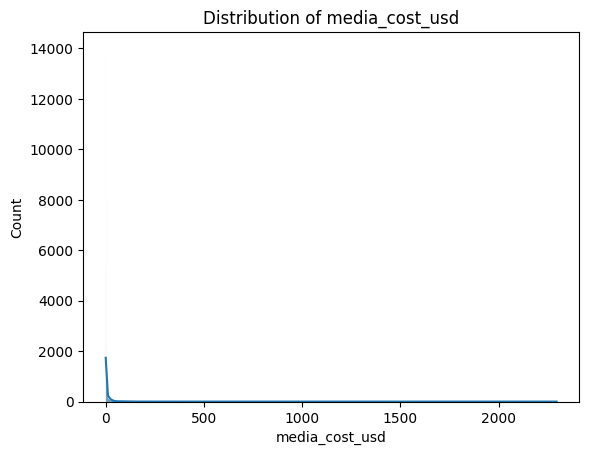

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['media_cost_usd'], kde=True)
plt.title('Distribution of media_cost_usd')
plt.show()

In [168]:
import numpy as np
df['media_cost_usd_log'] = np.log1p(df['media_cost_usd'])  # Use log1p to handle zero values


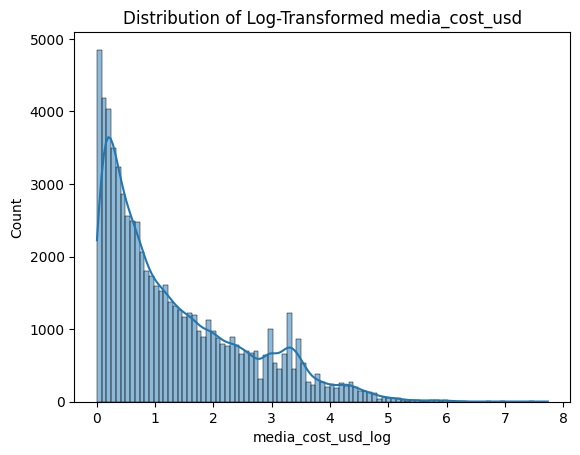

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['media_cost_usd_log'], kde=True)
plt.title('Distribution of Log-Transformed media_cost_usd')
plt.show()


In [174]:
df['keywords'].unique()

array(['delicate bracelets', 'summer jewelry', 'artisan jewelry',
       'layered bracelets', 'minimalist jewelry', 'beaded bracelets',
       'bridal jewelry', 'unique and trendy jewelry', 'clip-on earrings',
       'bohemian jewelry', 'layered jewelry', 'tribal jewelry',
       'rhinestone jewelry', 'statement rings', 'mixed metal jewelry',
       'chic and affordable jewelry', 'colorful jewelry', 'funky jewelry',
       'cuff bracelets', 'elegant and modern jewelry',
       'fashionable jewelry', 'statement necklaces', 'bold jewelry',
       'seashell jewelry', 'party jewelry', 'modern jewelry',
       'winter jewelry', 'seasonal jewelry', 'drop earrings',
       'charm bracelets', 'costume jewelry sets', 'pendant necklaces',
       'fashion jewelry for women', 'bangles', 'chic jewelry',
       'vintage-inspired jewelry', 'dazzling jewelry', 'spring jewelry',
       'stud earrings', 'beach jewelry', 'vibrant jewelry',
       'fashion brooches', 'gemstone jewelry', 'toe rings',
     

In [175]:
# Calculate overlap
unique_keywords = set(df['keywords'])
unique_search_tags = set(df['search_tags'])

# Find intersection, unique to keywords, and unique to search_tags
intersection = unique_keywords.intersection(unique_search_tags)
unique_to_keywords = unique_keywords.difference(unique_search_tags)
unique_to_search_tags = unique_search_tags.difference(unique_keywords)

# Result summary
overlap_analysis = {
    "Total Keywords": len(unique_keywords),
    "Total Search Tags": len(unique_search_tags),
    "Overlap Count": len(intersection),
    "Unique to Keywords": len(unique_to_keywords),
    "Unique to Search Tags": len(unique_to_search_tags)
}

intersection, overlap_analysis

(set(),
 {'Total Keywords': 118,
  'Total Search Tags': 6,
  'Overlap Count': 0,
  'Unique to Keywords': 118,
  'Unique to Search Tags': 6})

In [177]:
df['search_tags'].unique()

array(['#The Power of X', '#Be Bold. Be X',
       '#Embrace Your Individuality with X',
       '#The Ultimate Fashion Statement with X',
       '#The X Factor - Fashion for the Fearless', '#Timeless X Style'],
      dtype=object)

In [178]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np

# Initialize the pre-trained model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
# Generate embeddings for the 'keywords' column
def generate_embeddings(keywords_list, model):
    # Generate embeddings for the list of keywords
    embeddings = model.encode(keywords_list, show_progress_bar=True)
    return embeddings

# Apply embedding generation
df['keywords_embedding'] = generate_embeddings(df['keywords'].tolist(), model)

# Expand embeddings into separate columns
embedding_dim = len(df['keywords_embedding'][0])
embeddings_df = pd.DataFrame(df['keywords_embedding'].to_list(), columns=[f'keyword_emb_{i}' for i in range(embedding_dim)])

# Combine the embeddings with the original DataFrame
df = pd.concat([df, embeddings_df], axis=1)

# Drop the original 'keywords_embedding' column (optional)
df.drop(columns=['keywords_embedding'], inplace=True)

# Output the final DataFrame
print(df.head())

c:\Users\Thinkpad\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Thinkpad\.cache\huggingface\hub\models--sentence-transformers--paraphrase-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


ChunkedEncodingError: ('Connection broken: IncompleteRead(23642650 bytes read, 67225723 more expected)', IncompleteRead(23642650 bytes read, 67225723 more expected))